## Importando todas as bibliotecas necessárias

In [1]:
# Code source : https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K

import tensorflow as tf


from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join


## Necessário estabelecer o diretório de treino e o de validação
* eles serão utilizados para realizar o teste no final do modelo
* a image_width deve ser 242 porque abaixo disso prejudica o modelo
* train_sample = 784 que é tudo que tem dentro do diretório 
* no diretório de validação tem 100 dentro do orchids e 100 dentro do no_orchids 
* data_set será entregue junto ao jupyter-notebook

***
## Algumas outras considerações:
* epochs = 5 devido ao baixo poder de processamento do notebook dos membros da equipe


In [2]:
img_width = 242 #150
img_height = 242 #150

train_data_dir = 'image_data/training'
validation_data_dir = 'image_data/validation'
train_samples = 784
validation_samples = 100
epochs = 5
batch_size = 20

# Check for TensorFlow or Thieno
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

## Criação de modelo padrão em uma CNN
* a ativação é uma sigmoide porque a resposta deve ser binária (0 = não orquídea, 1 = orquidea)
* modelo com 3 layers e depois uma camada de conclusão
* foi utilizado o modelo relu porque ele demanda baixo processamento e tem um ótimo resultado

In [3]:
model = Sequential()
# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (3,3) convulonational windows size
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

## Optimização do modelo
* tanto binary_crossentropy quando Adam ajudam na classificação de biários

In [4]:
import keras
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(lr=.0001),
              metrics=['accuracy'])

C:\Users\rafae\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


## Tornando a imagem mais nítida, facilitando a identificação

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [6]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

## Treinamento do modelo

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 1568 images belonging to 2 classes.


## Verificando quais as classes dos modelos

In [8]:
print(train_generator.class_indices)

{'not_orchid': 0, 'orchid': 1}


In [9]:
imgs, labels = next(train_generator)

## Mostrando algumas imagens

In [10]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

20
1.0


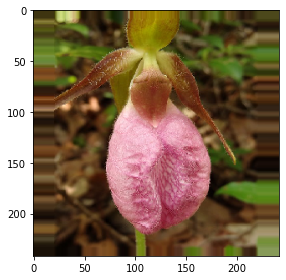

0.0


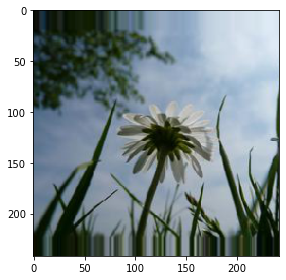

0.0


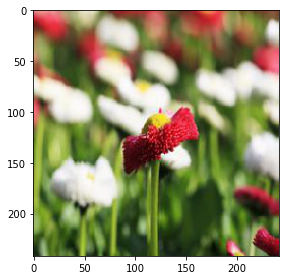

0.0


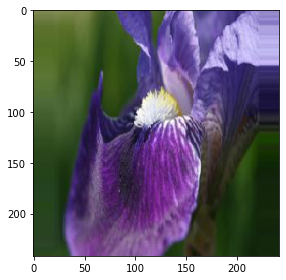

0.0


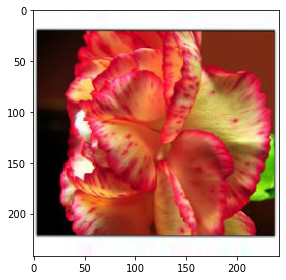

1.0


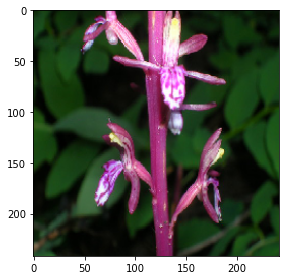

0.0


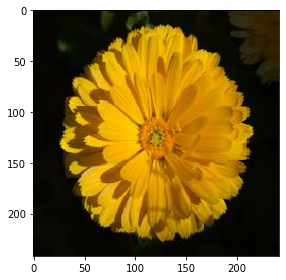

1.0


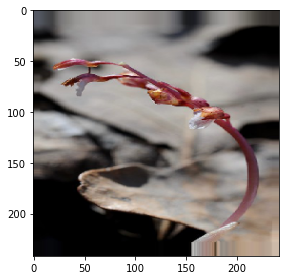

0.0


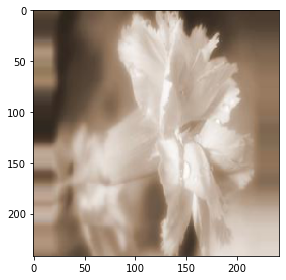

0.0


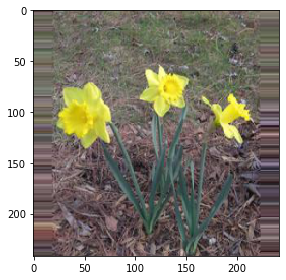

0.0


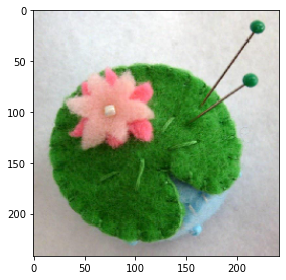

0.0


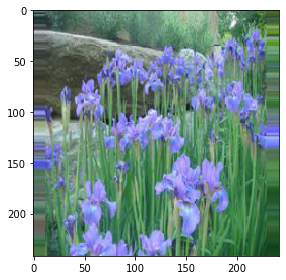

1.0


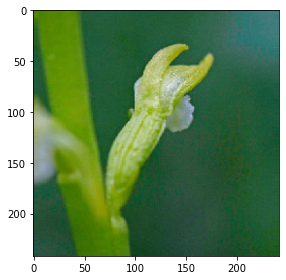

1.0


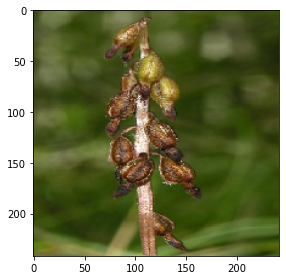

1.0


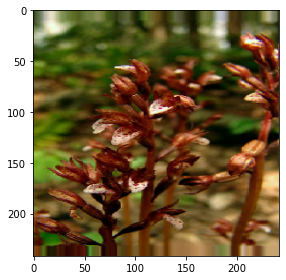

0.0


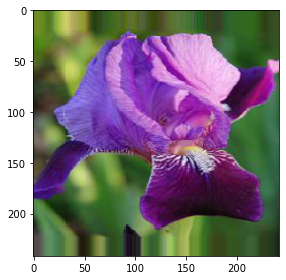

0.0


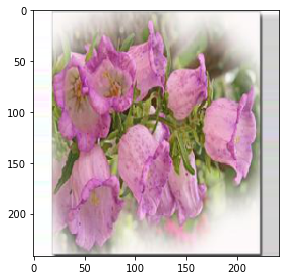

1.0


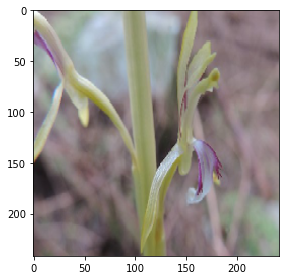

1.0


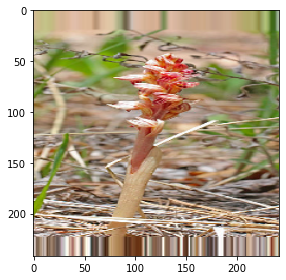

1.0


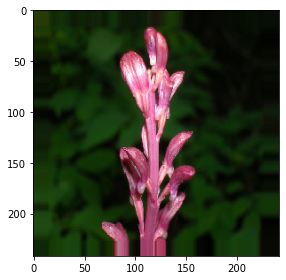

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

## Testando o dataset para verificar se faz sentido as classificações dadas

In [12]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 200 images belonging to 2 classes.


## Modelo agora está sendo executado

In [13]:
#In fit_generator(), you don't pass the x and y directly, instead they come from a generator.
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

<ipython-input-13-c50b88f1703c>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/5
39/39 [==============================] - 74s 2s/step - loss: 0.6718 - accuracy: 0.5833 - val_loss: 0.6152 - val_accuracy: 0.7700
Epoch 2/5
39/39 [==============================] - 63s 2s/step - loss: 0.5808 - accuracy: 0.6821 - val_loss: 0.5836 - val_accuracy: 0.7600
Epoch 3/5
39/39 [==============================] - 62s 2s/step - loss: 0.5092 - accuracy: 0.7679 - val_loss: 0.5319 - val_accuracy: 0.7300
Epoch 4/5
39/39 [==============================] - 65s 2s/step - loss: 0.4622 - accuracy: 0.7923 - val_loss: 0.4919 - val_accuracy: 0.7700
Epoch 5/5
39/39 [==============================] - 63s 2s/step - loss: 0.3938 - accuracy: 0.8436 - val_loss: 0.4463 - val_accuracy: 0.8200


## Veriicação da qualidade do modelo
* Possível verificar um aumento da model_accuracy e um decrescimento do model loss, o que demonstra qualidade no modelo

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


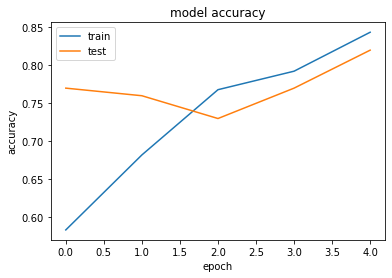

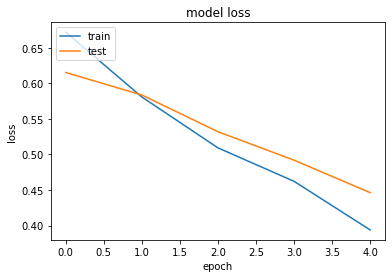

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Pegando as imagens que serão destadas para verificar se o modelo realmente é bom

In [15]:

## Now Predict
predict_dir_path='image_data/test/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['1102.jpg', '1140.jpg', '1146.jpg', '1201.jpg', '12986871263_639e5e5d72_c.jpg', '1359.jpg', '13592507555_97b652faff_c.jpg', '13662356443_e029b05aec_c.jpg', '1375.jpg', '1413.jpg', '14388573438_36dda3b0cb_c.jpg', '1440.jpg', '14431129917_3a5a968151_c.jpg', '14604111898_8d689dc725_c.jpg', '14918553605_e1b841b920_c.jpg', '15028443241_a40157658e_c.jpg', '15237463024_bce98299b2_c.jpg', '1535.jpg', '1551.jpg', '1591.jpg', '17557452795_339574cab2_c.jpg', '18120244292_ea11fcc9c5_c.jpg', '1856.jpg', '1895.jpg', '19324996661_4676b644e6_c.jpg', '1971.jpg', '2357.jpg', '2402.jpg', '24495134089_802c6a683d_c.jpg', '2478958642_1396be2646_c.jpg', '2481.jpg', '2515.jpg', '26005903776_004a435cfd_c.jpg', '2600911197_460f9655f3_c.jpg', '26042838032_727e3ca103_c.jpg', '2610.jpg', '2612.jpg', '2614.jpg', '26172234305_2f2e89d8f6_c.jpg', '2626125728_5684b334d5_c.jpg', '2646.jpg', '2678.jpg', '2706760440_da50e42ac8_c.jpg', '2750.jpg', '27799050684_e1e587a3ac_c.jpg', '28563725174_3a2f30577a_c.jpg', '2874.jpg',

## Predição das imagens sendo realizada

In [16]:
# predicting images
from keras.preprocessing import image

#dog_counter = 0 
not_orchid_counter = 0
orchid_counter = 0
#cat_counter  = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    
    classes = (model.predict(images) > 0.5).astype("int32")
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'not orchid')
        not_orchid_counter += 1
    else:
        print(file + ": " + 'orchid')
        orchid_counter += 1
print("Total Not Orchids :",not_orchid_counter)
print("Total Orchids :",orchid_counter)

1102.jpg: orchid
1140.jpg: orchid
1146.jpg: orchid
1201.jpg: orchid
12986871263_639e5e5d72_c.jpg: not orchid
1359.jpg: orchid
13592507555_97b652faff_c.jpg: not orchid
13662356443_e029b05aec_c.jpg: orchid
1375.jpg: orchid
1413.jpg: not orchid
14388573438_36dda3b0cb_c.jpg: not orchid
1440.jpg: orchid
14431129917_3a5a968151_c.jpg: not orchid
14604111898_8d689dc725_c.jpg: not orchid
14918553605_e1b841b920_c.jpg: not orchid
15028443241_a40157658e_c.jpg: not orchid
15237463024_bce98299b2_c.jpg: not orchid
1535.jpg: orchid
1551.jpg: orchid
1591.jpg: not orchid
17557452795_339574cab2_c.jpg: not orchid
18120244292_ea11fcc9c5_c.jpg: orchid
1856.jpg: not orchid
1895.jpg: orchid
19324996661_4676b644e6_c.jpg: not orchid
1971.jpg: not orchid
2357.jpg: not orchid
2402.jpg: orchid
24495134089_802c6a683d_c.jpg: not orchid
2478958642_1396be2646_c.jpg: not orchid
2481.jpg: orchid
2515.jpg: orchid
26005903776_004a435cfd_c.jpg: orchid
2600911197_460f9655f3_c.jpg: not orchid
26042838032_727e3ca103_c.jpg: no

## Acurácia do nosso modelo

In [17]:
erro_orquideas = f"{np.sqrt((100-orchid_counter)**2)}%"
erro_nao_orquideas = f"{np.sqrt((100-not_orchid_counter)**2)}%"

In [18]:
erro_orquideas

'2.0%'

In [19]:
erro_nao_orquideas

'2.0%'